In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('./project/College_adj.csv', index_col=0)
df.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [3]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(df)
x

array([[-3.46881819e-01, -3.21205453e-01, -6.35089011e-02, ...,
        -8.67574189e-01, -5.01910084e-01, -3.18251941e-01],
       [-2.10884040e-01, -3.87029908e-02, -2.88584214e-01, ...,
        -5.44572203e-01,  1.66109850e-01, -5.51261842e-01],
       [-4.06865631e-01, -3.76317928e-01, -4.78121319e-01, ...,
         5.85934748e-01, -1.77289956e-01, -6.67766793e-01],
       ...,
       [-2.33895071e-01, -4.23771558e-02, -9.15087008e-02, ...,
        -2.21570217e-01, -2.56241250e-01, -9.59029170e-01],
       [ 1.99171118e+00,  1.77256262e-01,  5.78332661e-01, ...,
         2.12019418e+00,  5.88797079e+00,  1.95359460e+00],
       [-3.26765760e-03, -6.68715889e-02, -9.58163623e-02, ...,
         4.24433755e-01, -9.87115613e-01,  1.95359460e+00]])

In [4]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2)
km.fit(df)
df['label'] = km.labels_
df.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,label
Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1


In [5]:
df[df.label == 0].mean()

Apps           10363.138889
Accept          6550.898148
Enroll          2569.722222
Top10perc         41.490741
Top25perc         70.203704
F.Undergrad    13061.935185
P.Undergrad     2464.861111
Outstate       10719.175926
Room.Board      4643.472222
Books            595.212963
Personal        1714.203704
PhD               86.398148
Terminal          91.333333
S.F.Ratio         14.027778
perc.alumni       20.074074
Expend         14170.500000
Grad.Rate         67.592593
label              0.000000
dtype: float64

In [6]:
(( df[df.label == 0].mean() - df[df.label == 1].mean() )/df.mean()).sort_values() 

label         -1.161435
perc.alumni   -0.136336
S.F.Ratio     -0.005105
Outstate       0.030981
Grad.Rate      0.037777
Room.Board     0.076215
Books          0.096893
Terminal       0.169483
PhD            0.219593
Top25perc      0.299890
Personal       0.323627
Expend         0.542273
Top10perc      0.587161
P.Undergrad    2.185672
Accept         2.607351
Enroll         2.665063
Apps           2.848413
F.Undergrad    2.938827
dtype: float64

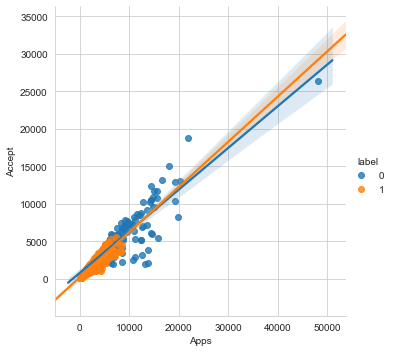

In [7]:
sns.set_style('whitegrid')
sns.lmplot('Apps', 'Accept', data=df, hue = 'label')

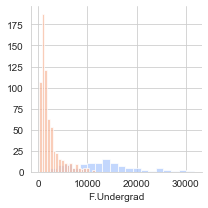

In [8]:
g = sns.FacetGrid(df, hue='label', palette = 'coolwarm')
g = g.map(plt.hist, 'F.Undergrad', bins = 20, alpha = 0.7)

In [9]:
pr = pd.read_csv('./project/College_Data')['Private'].apply(lambda x: 1 if x=='Yes' else 0)

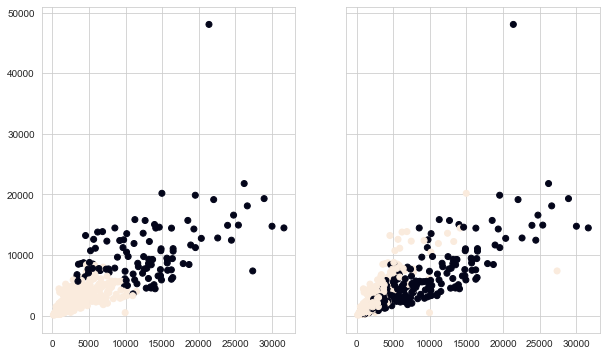

In [10]:
f, (ax1, ax2) = plt.subplots(1,2,sharey = True, figsize=(10,6))
ax1.scatter( df['F.Undergrad'],df['Apps'], c=df['label'] )
ax2.scatter(df['F.Undergrad'],df['Apps'], c=pr )
plt.show()

In [11]:
from sklearn.metrics import classification_report
print(classification_report(pr, df.label))

              precision    recall  f1-score   support

           0       0.69      0.35      0.46       212
           1       0.79      0.94      0.86       565

    accuracy                           0.78       777
   macro avg       0.74      0.64      0.66       777
weighted avg       0.76      0.78      0.75       777



In [13]:
np.mean(df.label.values == pr)

0.7786357786357786

In [16]:
df2 = pd.read_csv('./project/College_Data', index_col=0)

In [17]:
df2

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [18]:
from sklearn.model_selection import train_test_split
y = df2.Private.apply(lambda x: 1 if x=='Yes' else 0)
x = df2.drop('Private', axis=1)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3)

In [26]:
from sklearn.preprocessing import StandardScaler
x = sc.fit_transform(x)

In [33]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss = 'perceptron')
sgd.fit(x_train, y_train)
preds = sgd.predict(x_test)

from sklearn.metrics import classification_report
report = classification_report(y_test, preds)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.92      0.88        65
           1       0.97      0.93      0.95       169

    accuracy                           0.93       234
   macro avg       0.91      0.93      0.92       234
weighted avg       0.93      0.93      0.93       234



In [28]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)
predicts = svc.predict(x_test)
print(classification_report(y_test, predicts))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87        65
           1       0.94      0.96      0.95       169

    accuracy                           0.93       234
   macro avg       0.91      0.90      0.91       234
weighted avg       0.93      0.93      0.93       234



In [34]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(x_train, y_train)
forest_pr = forest.predict(x_test)
print(classification_report(y_test, forest_pr ))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90        65
           1       0.96      0.96      0.96       169

    accuracy                           0.94       234
   macro avg       0.93      0.93      0.93       234
weighted avg       0.94      0.94      0.94       234

